In [2]:
import numpy as np
import os
import sys
import cv2 as cv
from matplotlib import pyplot as plt
import math
import pandas as pd
import seaborn as sns
import seaborn as sns


# 3pt UpRight Analysis

In [3]:
path = "/Users/augustelefevre/Documents/Zurich/MA4/3DVision/Project/additionals/scene0000_00_final_results_3p_gap32.txt"
results = np.loadtxt(path, dtype=float)
results = sorted(results, key=lambda x:x[0])

In [4]:
image = [x[1] for x in results]
R_err_10 = [x[2] for x in results]
t_err = [x[3] for x in results]
pts = [x[4] for x in results]
time = [x[6] for x in results]

### R_err 

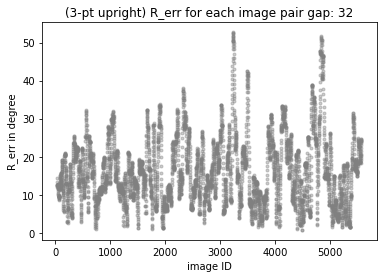

In [5]:
bins = np.linspace(0, 180, 100)

plt.plot(image, R_err_10, ".", alpha=0.4, color="grey")
plt.title(label="(3-pt upright) R_err for each image pair gap: 32")
plt.ylabel("R_err in degree")
plt.xlabel("image ID")
plt.show()

### Running time

In [6]:
avg = np.mean(time)
mmax = np.max(time)
mmin = np.min(time)
median = np.median(time)
print(avg, median, mmax, mmin)

0.32466286251014465 0.32049405574798584 0.467926025390625 0.2967250347137451


[Text(0.5, 1.0, 'scatter plot R_err vs Running time')]

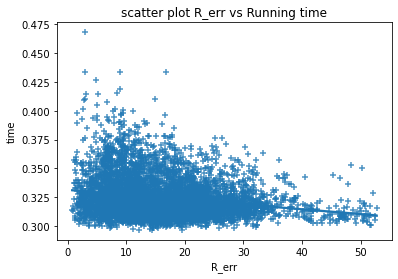

In [8]:
df = pd.DataFrame({'R_err':R_err_10, 'time':time})
m, b = np.polyfit(R_err_10, time, 1)
sns.regplot(data=df, x="R_err", y="time", marker="+").set(title='scatter plot R_err vs Running time')


[Text(0.5, 1.0, 'scatter plot #pts vs Running time')]

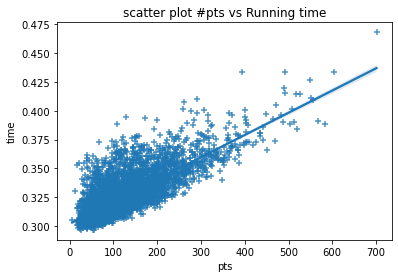

In [9]:
df = pd.DataFrame({'pts':pts, 'time':time})
sns.regplot(data=df, x="pts", y="time", marker="+").set(title='scatter plot #pts vs Running time')


# 5pt Analyis

In [10]:
path = "/Users/augustelefevre/Documents/Zurich/MA4/3DVision/Project/additionals/scene0000_00_final_results_5p_gap32.txt"
results_5 = np.loadtxt(path, dtype=float)
results_5 = sorted(results_5, key=lambda x:x[0])

In [11]:
image_5 = [x[1] for x in results_5]
R_err_10_5 = [x[2] for x in results_5]
t_err_5 = [x[3] for x in results_5]
pts_5 = [x[4] for x in results_5]
time_5 = [x[6] for x in results_5]

### R error

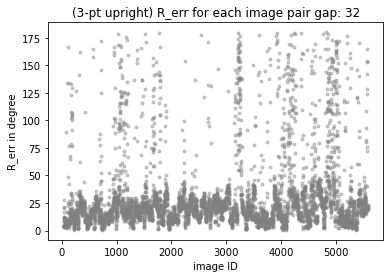

In [12]:
bins = np.linspace(0, 180, 100)

plt.plot(image, R_err_10_5, ".", alpha=0.4, color="grey")
plt.title(label="(3-pt upright) R_err for each image pair gap: 32")
plt.ylabel("R_err in degree")
plt.xlabel("image ID")
plt.show()

### Running time

In [13]:
avg_5 = np.mean(time_5)
mmax_5 = np.max(time_5)
mmin_5 = np.min(time_5)
median_5 = np.median(time_5)
print(avg_5, median_5, mmax_5, mmin_5)

0.5706745712842229 0.42486822605133057 2.1112499237060547 0.30391716957092285


[Text(0.5, 1.0, 'scatter plot R_err vs Running time')]

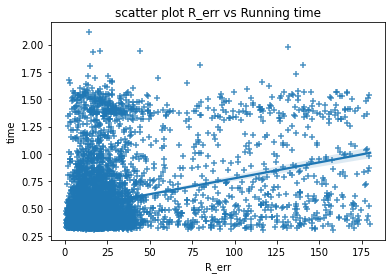

In [25]:
df = pd.DataFrame({'R_err':R_err_10_5, 'time':time_5})
m, b = np.polyfit(R_err_10_5, time_5, 1)
sns.regplot(data=df, x="R_err", y="time", marker="+").set(title='scatter plot R_err vs Running time')

[Text(0.5, 1.0, 'scatter plot #pts vs Running time')]

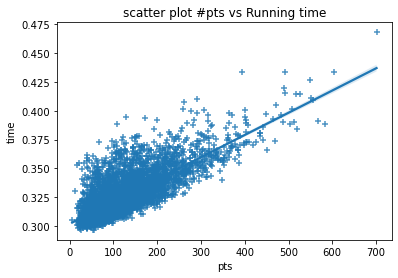

In [26]:
df = pd.DataFrame({'pts':pts, 'time':time})
sns.regplot(data=df, x="pts", y="time", marker="+").set(title='scatter plot #pts vs Running time')

# Comparison

In [27]:
subtracted_array = np.subtract(R_err_10_5, R_err_10)
diff = list(subtracted_array)
diff_step = [1 if x >= 0 else -1 for x in diff]

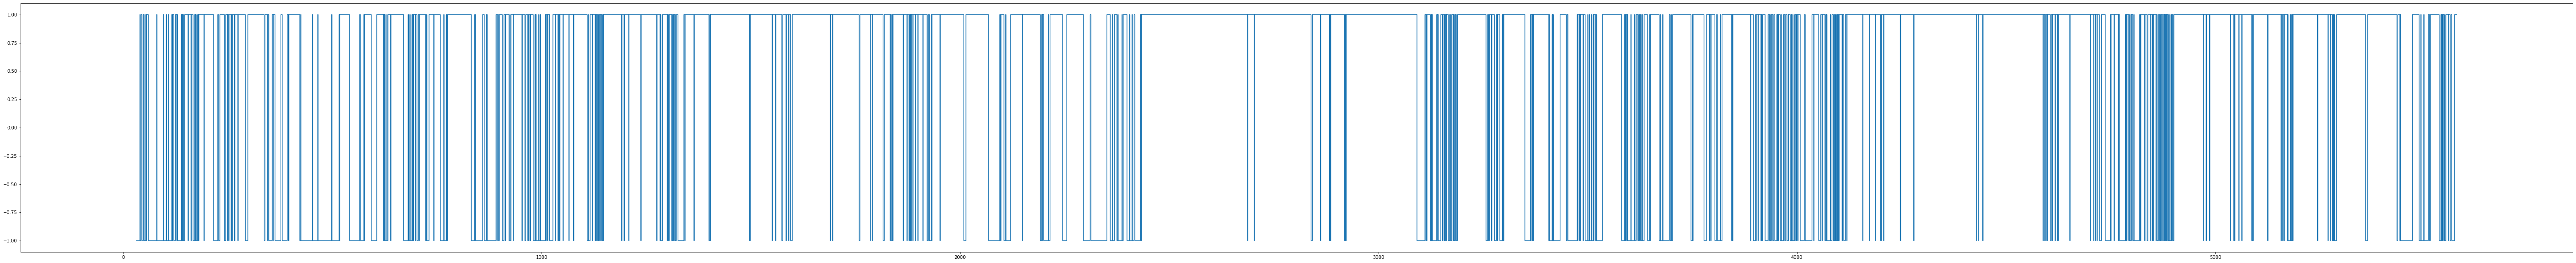

In [28]:
plt.figure(1, figsize=(100, 10)) # Figure size in inches (size_x, size_y)
plt.step(image, diff_step)
plt.show()

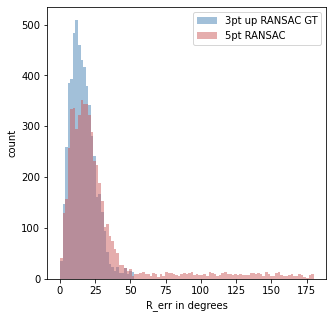

In [19]:
bins = np.linspace(0, 180, 100)
plt.figure(1, figsize=(5, 5))
plt.hist(R_err_10, bins, alpha=0.5, label='3pt up RANSAC GT', color="steelblue")
plt.hist(R_err_10_5, bins, alpha=0.5, label='5pt RANSAC', color="indianred")
#plt.title("Distributioin of R_err using 5pt and 3pt up RANSAC algo.")
plt.xlabel("R_err in degrees")
plt.ylabel("count")
plt.legend(loc='upper right')
plt.savefig("3p_vs_5p")
plt.show()

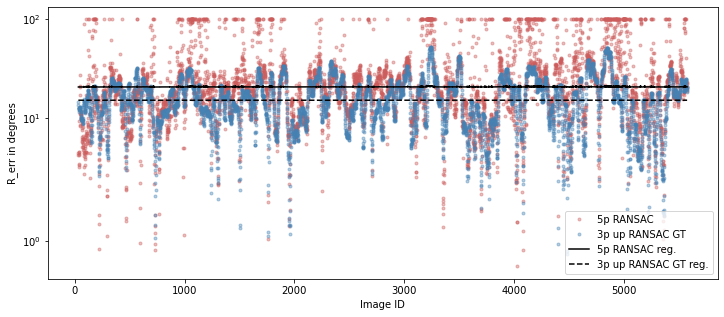

In [18]:
bins = np.linspace(0, 180, 100)

R_err_10_5_clip = np.array(R_err_10_5).clip(0,100)
R_err_10_clip = np.array(R_err_10).clip(0,100)

plt.figure(1, figsize=(12, 5))
plt.plot(image, R_err_10_5_clip, ".", alpha=0.4, color="indianred", label="5p RANSAC")
plt.plot(image, R_err_10_clip, ".", alpha=0.4, color="steelblue", label="3p up RANSAC GT")

R_err_10_5_arr = np.array(R_err_10_5)
R_err_10_arr = np.array(R_err_10)

m, b = np.polyfit(image, R_err_10_5_arr, 1)
plt.plot(image, m*R_err_10_5_arr + b, color="black", label="5p RANSAC reg.")

m_p, b_p = np.polyfit(image, R_err_10_arr, 1)
plt.plot(image, m_p*R_err_10_arr + b_p, color="black", ls="--", label="3p up RANSAC GT reg.")

plt.legend(loc='lower right')
#plt.title("R_err using 5p and 3p RANSAC algo. for each image's pair")
plt.xlabel("Image ID")
plt.ylabel("R_err in degrees")
plt.yscale("symlog")
plt.savefig("comparison.png")
plt.show()

In [20]:
avg = np.mean(R_err_10)
median = np.median(R_err_10)
std = np.std(R_err_10)
print(avg, median, std)
  
print("Q1 quantile of SLtractors : ", np.quantile(R_err_10, .25, interpolation='midpoint'))
print("Q2 quantile of SLtractors : ", np.quantile(R_err_10, .50, interpolation='midpoint'))
print("Q3 quantile of SLtractors : ", np.quantile(R_err_10, .75, interpolation='midpoint'))

16.231490649206755 14.959680992599747 8.842180381657387
Q1 quantile of SLtractors :  9.63666473005151
Q2 quantile of SLtractors :  14.959680992599747
Q3 quantile of SLtractors :  21.321761159708615


/var/folders/d0/6s5qwykd3r35_tc97lhkwtk00000gn/T/ipykernel_26552/2517125223.py:6: DeprecationWarning: the `interpolation=` argument to quantile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher', or 'midpoint' are encouraged to review the method they. (Deprecated NumPy 1.22)
  print("Q1 quantile of SLtractors : ", np.quantile(R_err_10, .25, interpolation='midpoint'))
/var/folders/d0/6s5qwykd3r35_tc97lhkwtk00000gn/T/ipykernel_26552/2517125223.py:7: DeprecationWarning: the `interpolation=` argument to quantile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher', or 'midpoint' are encouraged to review the method they. (Deprecated NumPy 1.22)
  print("Q2 quantile of SLtractors : ", np.quantile(R_err_10, .50, interpolation='midpoint'))
/var/folders/d0/6s5qwykd3r35_tc97lhkwtk00000gn/T/ipykernel_26552/2517125223.py:8: DeprecationWarning: the `interpolation=` argument to quantile was rename

In [21]:
avg = np.mean(R_err_10_5)
median = np.median(R_err_10_5)
std = np.std(R_err_10_5)
print(avg, median, std)
  
print("Q1 quantile of SLtractors : ", np.quantile(R_err_10_5, .25, interpolation='midpoint'))
print("Q2 quantile of SLtractors : ", np.quantile(R_err_10_5, .50, interpolation='midpoint'))
print("Q3 quantile of SLtractors : ", np.quantile(R_err_10_5, .75, interpolation='midpoint'))

29.385709632532226 19.30873395123876 33.55898661163407
Q1 quantile of SLtractors :  11.721788039771258
Q2 quantile of SLtractors :  19.30873395123876
Q3 quantile of SLtractors :  28.995615269652877


/var/folders/d0/6s5qwykd3r35_tc97lhkwtk00000gn/T/ipykernel_26552/3682894710.py:6: DeprecationWarning: the `interpolation=` argument to quantile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher', or 'midpoint' are encouraged to review the method they. (Deprecated NumPy 1.22)
  print("Q1 quantile of SLtractors : ", np.quantile(R_err_10_5, .25, interpolation='midpoint'))
/var/folders/d0/6s5qwykd3r35_tc97lhkwtk00000gn/T/ipykernel_26552/3682894710.py:7: DeprecationWarning: the `interpolation=` argument to quantile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher', or 'midpoint' are encouraged to review the method they. (Deprecated NumPy 1.22)
  print("Q2 quantile of SLtractors : ", np.quantile(R_err_10_5, .50, interpolation='midpoint'))
/var/folders/d0/6s5qwykd3r35_tc97lhkwtk00000gn/T/ipykernel_26552/3682894710.py:8: DeprecationWarning: the `interpolation=` argument to quantile was re